<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/2_3_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
5759,Female,58.0,0,0,No Info,32.03,5.0,126,0
5760,Male,25.0,0,0,never,29.96,5.0,90,0
5761,Female,61.0,0,0,current,23.49,4.8,80,0
5762,Male,68.0,0,0,No Info,21.73,4.5,155,0


Text(0, 0.5, 'BMI')

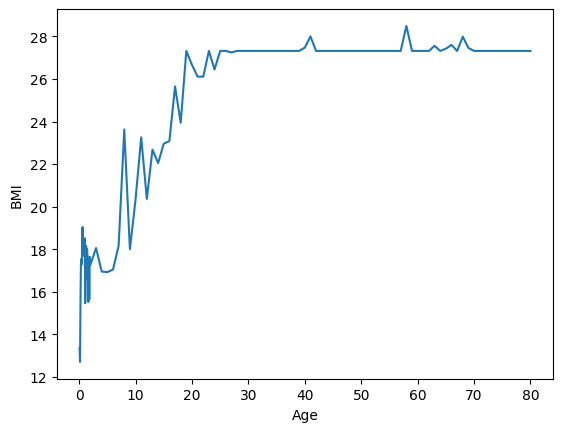

In [ ]:
df.groupby('age')['bmi'].median().plot()
plt.xlabel('Age')
plt.ylabel('BMI')

Text(0, 0.5, 'BMI')

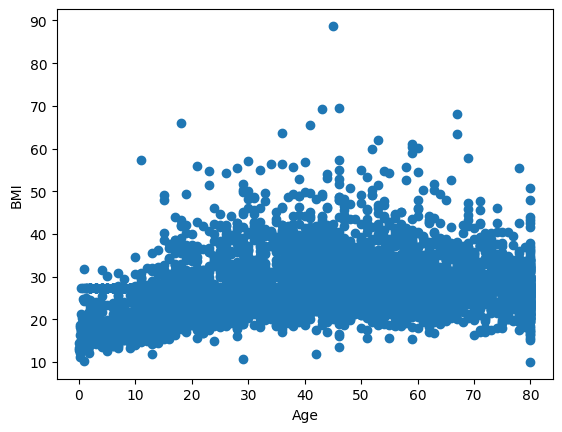

In [ ]:
plt.scatter(df['age'],df['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')

<Axes: xlabel='gender', ylabel='count'>

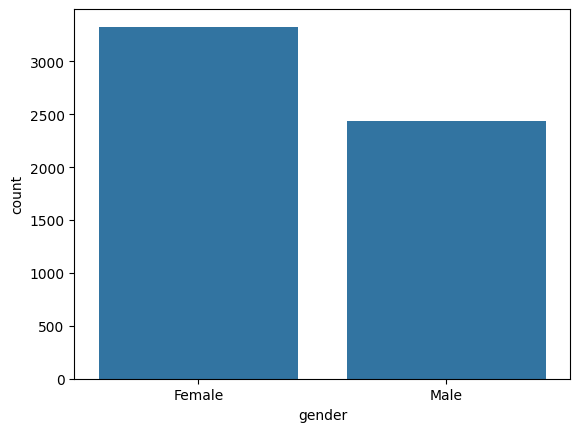

In [ ]:
sns.countplot(df,x='gender')

<Axes: xlabel='smoking_history', ylabel='count'>

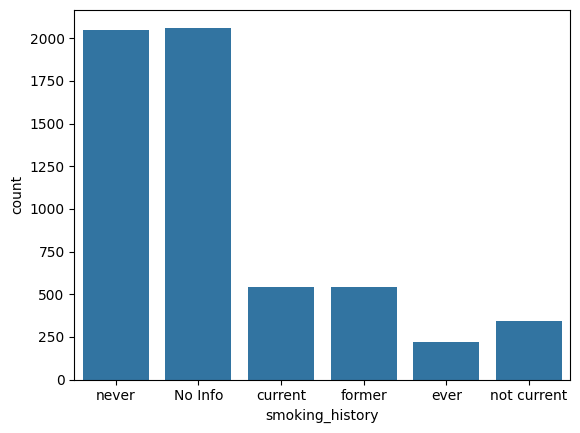

In [ ]:
sns.countplot(df,x='smoking_history')

In [ ]:
temp=df['smoking_history'].value_counts()/len(df)
temp=temp[temp>0.05].index

In [ ]:
temp

Index(['No Info', 'never', 'former', 'current', 'not current'], dtype='object')

In [ ]:
df['smoking_history']=np.where(df['smoking_history'].isin(temp),df['smoking_history'],'Rare')

In [ ]:
df.drop(['gender','smoking_history'],axis=1,inplace=True)

In [ ]:
label_one=df[df['diabetes']==1]
label_zero=df[df['diabetes']==0]

In [ ]:
label_zero=label_zero.sample(n=504)

In [ ]:
df=pd.concat([label_zero,label_one],ignore_index=True)

In [ ]:

X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42,test_size=0.3)

In [ ]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
163,46.0,0,0,27.32,5.8,140
390,51.0,0,0,25.70,4.5,80
248,62.0,0,0,27.32,3.5,200
0,61.0,0,0,27.29,6.0,200
368,47.0,0,0,27.32,3.5,90
...,...,...,...,...,...,...
734,54.0,0,0,27.32,6.8,220
194,55.0,0,0,29.09,5.7,160
800,43.0,1,0,30.99,6.2,280
107,21.0,0,0,22.90,4.5,155


In [ ]:
cv_score = cross_val_score(RandomForestClassifier(), X_train,y_train, cv=5)

In [ ]:
print(np.mean(cv_score))

0.8992907801418439
